<a href="https://colab.research.google.com/github/Ekaterina37/CS6375.502/blob/master/Assignment1_Grad_desc_Real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [112]:
#data = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
#data.head()
#data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";") 
data = pd.read_csv("https://raw.githubusercontent.com/Ekaterina37/CS6375.502/master/winequality-red%20(1).csv")

data =pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")

In [113]:
#dropping a useless No column
#data = data.drop('No', 1)

for col in data.columns:
  print(col)

No
X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
Y house price of unit area


In [114]:
#print first 5 rows
print(data)

      No  X1 transaction date  ...  X6 longitude  Y house price of unit area
0      1          2012.916667  ...     121.54024                        37.9
1      2          2012.916667  ...     121.53951                        42.2
2      3          2013.583333  ...     121.54391                        47.3
3      4          2013.500000  ...     121.54391                        54.8
4      5          2012.833333  ...     121.54245                        43.1
..   ...                  ...  ...           ...                         ...
409  410          2013.000000  ...     121.50381                        15.4
410  411          2012.666667  ...     121.54310                        50.0
411  412          2013.250000  ...     121.53986                        40.6
412  413          2013.000000  ...     121.54067                        52.5
413  414          2013.500000  ...     121.54310                        63.9

[414 rows x 8 columns]


In [ ]:
#assign x as a Dataframe of features and Y as series of outcomes

#X = data.drop('Y house price of unit area', 1) #feature matrix
#Y = data['Y house price of unit area'] #target variable
#newdata = data.values
#Y = newdata[:, -1].reshape(newdata.shape[0],1)
#X = newdata[:, :-1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
#checking for nulls - all good
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [116]:
#for the real estate
data = data.drop('No', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


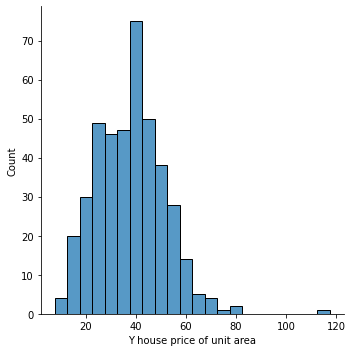

In [117]:
#plotting
#sns.displot(data['quality'])
sns.displot(data['Y house price of unit area'])

In [118]:
#making matrix for heatmap
matrix = data.corr()
print(matrix)

                                        X1 transaction date  ...  Y house price of unit area
X1 transaction date                                1.000000  ...                    0.087529
X2 house age                                       0.017542  ...                   -0.210567
X3 distance to the nearest MRT station             0.060880  ...                   -0.673613
X4 number of convenience stores                    0.009544  ...                    0.571005
X5 latitude                                        0.035016  ...                    0.546307
X6 longitude                                      -0.041065  ...                    0.523287
Y house price of unit area                         0.087529  ...                    1.000000

[7 rows x 7 columns]


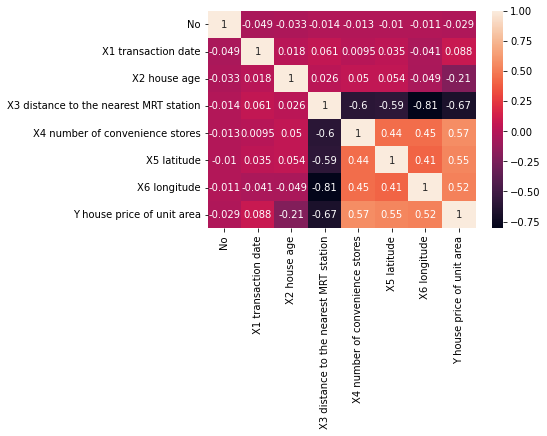

In [96]:
sns.heatmap(data = matrix, annot=True)

In [119]:
#standardization
s = StandardScaler()
data = pd.DataFrame(s.fit(data).fit_transform(data))

In [ ]:
#add column of 1's
#data.insert(0, "X1", 1)
#X.describe()

In [120]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=5)
train, test = train_test_split(data, test_size = 0.2, random_state=5)

In [121]:
print(train.shape)
print(test.shape)

(331, 7)
(83, 7)


In [122]:
train_data = train.values
Y = train_data[:, -1].reshape(train_data.shape[0], 1)
X = train_data[:, :-1]

In [123]:
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]

In [124]:
#Checking shape 1279 wines with 12 features
print("Shape X_train :", X.shape)
print("Shape Y_train :", Y.shape)
print("Shape X_test :", X_test.shape)
print("Shape Y_test :", Y_test.shape)

Shape X_train : (331, 6)
Shape Y_train : (331, 1)
Shape X_test : (83, 6)
Shape Y_test : (83, 1)


In [125]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [127]:
#theta - vector, matrix size 70,1
def model(X,Y, learn_rate, iter):
   m = Y.size
   theta = np.zeros((X.shape[1],1))
   cost_list = []

   for i in range(iter):
     y_predict = np.dot(X, theta)

     cost = (1/(2*m))*np.sum(np.square(y_predict - Y))

     d_theta = (1/m)*np.dot(X.T, y_predict - Y)
     theta = theta - learn_rate*d_theta
     
     cost_list.append(cost)
     
     # let's print cost of the 5 first times
     if(i%(iter/5) == 0):
       print("Cost is :", cost)
       
   return theta, cost_list



In [128]:
iter = 100000
learn_rate = 0.0001
theta, cost_list = model(X,Y,learn_rate, iter)

Cost is : 0.5293022356443842
Cost is : 0.22797725492943488
Cost is : 0.2247581242143092
Cost is : 0.22373406057410625
Cost is : 0.22321341055462546


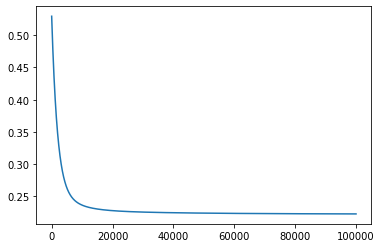

In [129]:
rng = np.arange(0, iter)
plt.plot(rng, cost_list)
plt.show()

In [130]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

In [131]:
error

0.4077222835774081

In [ ]:
#Now let's do it using a library
